In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import io

### 1.1 Horners algoritme

In [41]:
def horners(a,x):
    n = len(a)-1
    a.reverse()
    p = a[0]
    for i in range(n):
        p = a[i+1]+p*x
    return p


In [45]:
1+2*3+3*3**2

34

In [46]:
horners([1,2,3],3)

34

### 1.2 Effektiv beregning

11 + e^x * (9 + e^x * (7 + e^x * 5))

In [50]:
11+np.exp(1)*9+7*np.exp(2)+5*np.exp(3)

187.6156137645843

In [51]:
11 + np.exp(1) * (9 + np.exp(1) * (7 + np.exp(1) * 5))

187.6156137645843

### 1.3 Omskrivning af udtryk

Omskriv ved at indsæte $\frac{\sqrt{x^4+4}+2}{(\sqrt{x^4+4}+2)}$ eller benytte Taylor

$\frac{(\sqrt{x^4+4}+2)(\sqrt{x^4+4}-2)}{(\sqrt{x^4+4}+2)} = \frac{x^4}{\sqrt{x^4+4}+2}$

In [62]:
def f(x):
    return x**4/(np.sqrt(x**4+4)+2)
def fcancel(x):
    return (np.sqrt(x**4+4)-2)

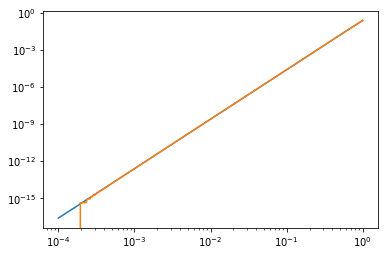

In [67]:
x = np.logspace(-4,0,500)
plt.loglog(x,list(map(f,x)),label="new")
plt.loglog(x,list(map(fcancel,x)),label="original")
plt.show()

### 1.4 Notation of kode

### 2.1 Datafitting

In [53]:
def Fc(x,c):
    return c[0]+c[1]*x+c[2]*np.sin(x)+c[3]*np.cos(x)+c[4]*np.sin(2*x)+c[5]*np.cos(2*x)

def F(x):
    return [1,x,np.sin(x),np.cos(x),np.sin(2*x),np.cos(2*x)]


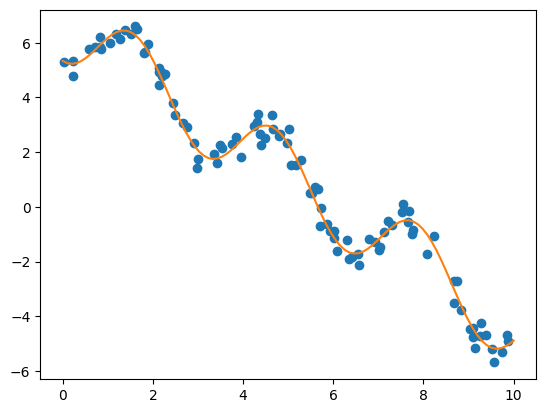

In [65]:
FitData = io.loadmat('FitData.mat')
x = np.array(FitData['x'].flatten())
y = np.array(FitData['y'].flatten())

A = np.array(list(map(F,x)))
c = np.linalg.solve(A.T@A, A.T@y)

plt.plot(x,y,'o')
plt.plot(np.linspace(0,10,100),list(map(lambda x: Fc(x,c),np.linspace(0,10,100))))
plt.show()

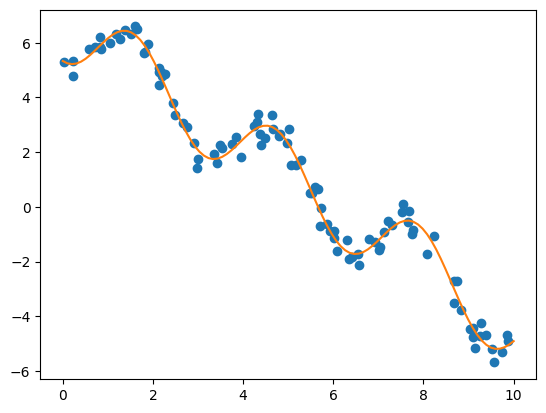

In [68]:
def Ftest(x):
    return [1,x,np.sin(x)**2,np.cos(x)**2]
def Fctest(x,c):
    return c[0]+c[1]*x+c[2]*np.sin(x)**2+c[3]*np.cos(x)**2

A = np.array(list(map(Ftest,x)))
c = np.linalg.solve(A.T@A, A.T@y)

plt.plot(x,y,'o')
plt.plot(np.linspace(0,10,100),list(map(lambda x: Fctest(x,c),np.linspace(0,10,100))))
plt.show()